# EDP = Exploratory Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from matplotlib_venn import venn2
from tqdm import tqdm


In [2]:
import src.functions as functions
import src.datasets as datasets 
import src.model_selection as model_selection 

# import custom functions
from src.functions import plot_correlations, plot_mutual_info, hello
from src.datasets import xy_train, xy_train_test, data_50000
from src.model_selection import validation_accuracy_score, rfe_evaluation_cv, skb_evaluation_cv

## Balanced vs original


In [3]:
df_original = datasets.data_original()
df_balanced = datasets.data_balanced()

In [4]:
rfe_original = rfe_evaluation_cv(dataset = df_original)

In [5]:
rfe_balanced = rfe_evaluation_cv(dataset = df_balanced)

In [7]:
skb_original = skb_evaluation_cv(dataset = df_original)

In [8]:
skb_balanced = skb_evaluation_cv(dataset = df_balanced)

In [9]:
rfe_original['label'] = "RFE original"
rfe_balanced['label'] = "RFE balanced"
skb_original['label'] = 'SKB original'
skb_balanced['label'] = 'SKB balanced'

In [10]:
rfe_original.head()

,score,features,label
k,,,
1,0.8130,[time],RFE original
2,0.8311,"[time, offtrt]",RFE original
3,0.8527,"[time, offtrt, cd420]",RFE original
4,0.8580,"[time, race, offtrt, cd420]",RFE original
5,0.8615,"[time, preanti, race, offtrt, cd420]",RFE original


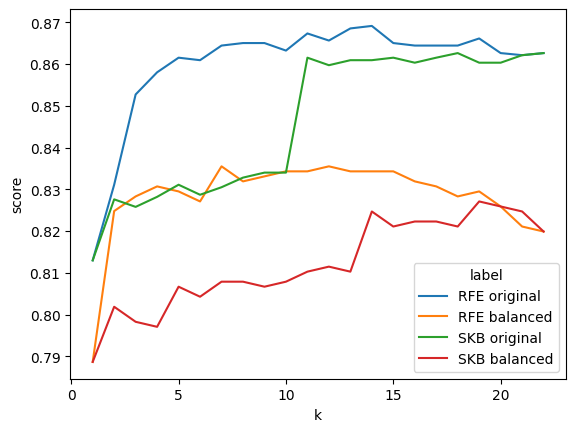

In [11]:
results_all = pd.concat([rfe_original, rfe_balanced, skb_original, skb_balanced])

sns.lineplot(data = results_all, x = "k", y = "score", hue = "label")
plt.show()

### Compare RFE balanced and original recall and selectivity


In [8]:
rfe_original.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22],
      dtype='int64', name='k')

In [18]:
rfe = rfe_original
df = datasets.data_original()
Xtrain,ytrain = xy_train(df)
model = LogisticRegression(random_state = 42)

r = []
for k in rfe.index:
    features = rfe.loc[k,"features"] 
    X = Xtrain[features]

    cv_scores = model_selection.cv_mean_scores(X, ytrain, model)

    cv_scores["k"] = k 
    cv_scores["dataset"] = "original"
    r.append(cv_scores)
rfe_results_original = pd.DataFrame(r)
rfe_results_original.set_index('k', inplace = True)
rfe_results_original

,accuracy,recall,selectivity,dataset
k,,,,
1,0.812956,0.503385,0.912658,original
2,0.831073,0.541968,0.924252,original
3,0.852703,0.587522,0.938167,original
4,0.857965,0.597160,0.942031,original
5,0.861461,0.601836,0.945120,original
6,0.860884,0.611503,0.941262,original
7,0.864391,0.618675,0.943581,original
8,0.864974,0.616265,0.945126,original
9,0.864974,0.621056,0.943584,original


In [19]:
rfe = rfe_balanced
df = datasets.data_balanced()
Xtrain,ytrain = xy_train(df)
model = LogisticRegression(random_state = 42)

r = []
for k in rfe.index:
    features = rfe.loc[k,"features"] 
    X = Xtrain[features]

    cv_scores = model_selection.cv_mean_scores(X, ytrain, model)

    cv_scores["k"] = k 
    cv_scores["dataset"] = "balanced"
    r.append(cv_scores)
rfe_results_balanced = pd.DataFrame(r)
rfe_results_balanced.set_index('k', inplace = True)
rfe_results_balanced

,accuracy,recall,selectivity,dataset
k,,,,
1,0.788738,0.726477,0.850832,balanced
2,0.824760,0.774613,0.874928,balanced
3,0.828324,0.779317,0.877367,balanced
4,0.830719,0.791365,0.870166,balanced
5,0.829536,0.791365,0.867728,balanced
6,0.827112,0.784079,0.870109,balanced
7,0.835531,0.791308,0.879748,balanced
8,0.831910,0.788870,0.874957,balanced
9,0.833114,0.786517,0.879748,balanced


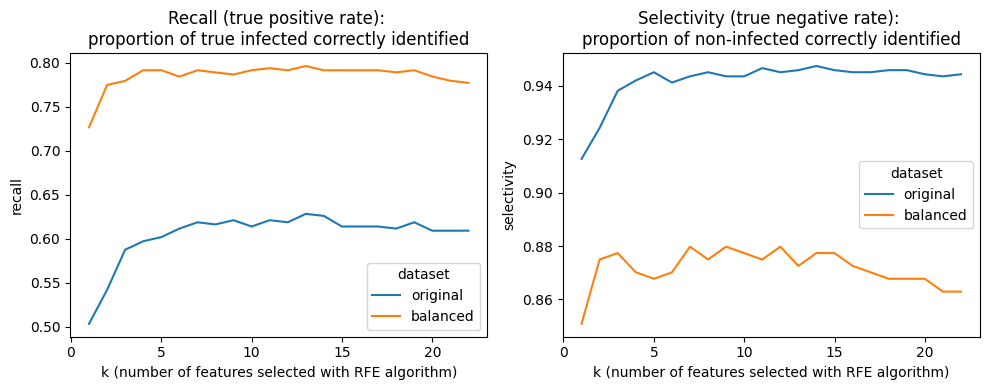

In [29]:
results_all = pd.concat([rfe_results_original, rfe_results_balanced])

fig,axes = plt.subplots(1,2, figsize=(10,4))
sns.lineplot(data = results_all, x = "k", y = "recall", hue = "dataset", ax = axes[0])
sns.lineplot(data = results_all, x = "k", y = "selectivity", hue = "dataset", ax = axes[1])
axes[0].set_xlabel("k (number of features selected with RFE algorithm)")
axes[1].set_xlabel("k (number of features selected with RFE algorithm)")

axes[0].set_title('Recall (true positive rate): \nproportion of true infected correctly identified')
axes[1].set_title('Selectivity (true negative rate): \nproportion of non-infected correctly identified')
plt.tight_layout()
plt.show()

## feature engineering on the variable time


In [12]:
df_time2 = df_original.copy()
df_time2["time**2"] = df_time2['time']**2

In [13]:
df_time2.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,time**2
0,948,2,48,89.8128,0,0,0,100,0,0,...,1,0,1,0,422,477,566,324,0,898704
1,1002,3,61,49.4424,0,0,0,90,0,1,...,3,0,1,0,162,218,392,564,1,1004004
2,961,3,45,88.4520,0,1,1,90,0,1,...,3,0,1,1,326,274,2063,1893,0,923521
3,1166,3,47,85.2768,0,1,0,100,0,1,...,3,0,1,0,287,394,1590,966,0,1359556
4,1090,0,43,66.6792,0,1,0,100,0,1,...,3,0,0,0,504,353,870,782,0,1188100


In [14]:
rfe_time2 = rfe_evaluation_cv(dataset = df_time2)

In [15]:
skb_time2 = skb_evaluation_cv(dataset = df_time2)

In [16]:
rfe_time2['label'] = "RFE time^2"
skb_time2['label'] = 'SKB time^2'

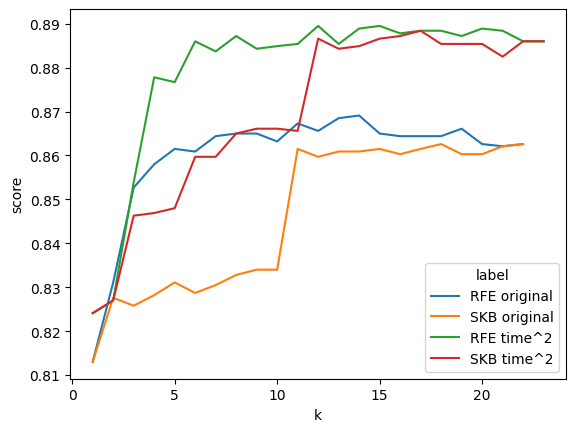

In [17]:
results_all = pd.concat([rfe_original, skb_original, rfe_time2, skb_time2])

sns.lineplot(data = results_all, x = "k", y = "score", hue = "label")
plt.show()

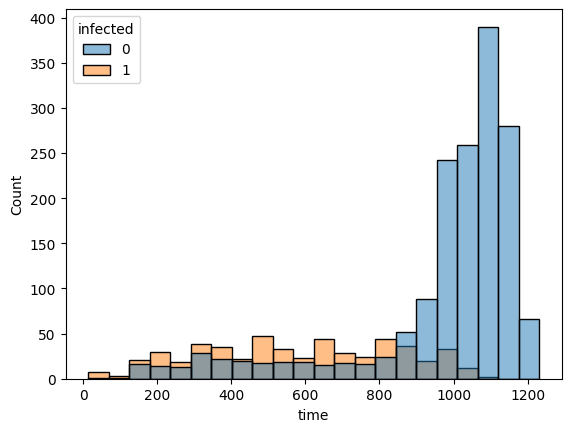

In [18]:
sns.histplot(data = df_original, x = "time", hue = "infected")
plt.show()

In [26]:
df_time730 = df_original.copy()
df_time730["time730"] = (df_time730['time'] > 730).astype(int) * (df_time730['time'] - 730)
df_time7300 = df_time730.copy()
df_time730 = df_time730.drop(columns = ['time'])

In [23]:
rfe_time730 = rfe_evaluation_cv(dataset = df_time730)
skb_time730 = skb_evaluation_cv(dataset = df_time730)

rfe_time730['label'] = "RFE time730"
skb_time730['label'] = 'SKB time730'

In [27]:
rfe_time7300 = rfe_evaluation_cv(dataset = df_time7300)
skb_time7300 = skb_evaluation_cv(dataset = df_time7300)

rfe_time7300['label'] = "RFE time7300"
skb_time7300['label'] = 'SKB time7300'

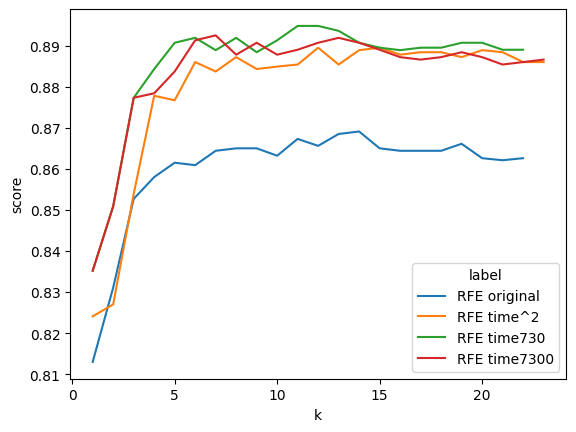

In [28]:


results_all = pd.concat([rfe_original, rfe_time2, rfe_time730, rfe_time7300])

sns.lineplot(data = results_all, x = "k", y = "score", hue = "label")
plt.show()

